#### Program that takes as inputs two texts and uses a metric to determine how similar they are:

In [19]:
import math 
import string 
import sys
import matplotlib
import matplotlib.pyplot as plt

In [20]:
#Input two texts

text1 = input("Enter first text: ")
print("\n")
text2 = input("Enter second text: ")

#Sample Texts provided
#text1="The easiest way to earn points with Fetch Rewards is to just shop for the products you already love. If you have any participating brands on your receipt, you'll get points based on the cost of the products. You don't need to clip any coupons or scan individual barcodes. Just scan each grocery receipt after you shop and we'll find the savings for you."
#text2="The easiest way to earn points with Fetch Rewards is to just shop for the items you already buy. If you have any eligible brands on your receipt, you will get points based on the total cost of the products. You do not need to cut out any coupons or scan individual UPCs. Just scan your receipt after you check out and we will find the savings for you."

Enter first text: The easiest way to earn points with Fetch Rewards is to just shop for the products you already love. If you have any participating brands on your receipt, you'll get points based on the cost of the products. You don't need to clip any coupons or scan individual barcodes. Just scan each grocery receipt after you shop and we'll find the savings for you.


Enter second text: The easiest way to earn points with Fetch Rewards is to just shop for the items you already buy. If you have any eligible brands on your receipt, you will get points based on the total cost of the products. You do not need to cut out any coupons or scan individual UPCs. Just scan your receipt after you check out and we will find the savings for you.


#### Pre-process the data

In [21]:
#PRE-PROCESSING

# 1. Convert text into lowercase

def text_to_lower(text):
    text = text.lower()
    return text
#text

# 2. Remove Punctuations 

remove_punctuation = str.maketrans('','',string.punctuation)

def split_remove_punctuation(text):
    text = text.translate(remove_punctuation)
    return text


# 3. Split the text into words AND Remove Stop Words 

def remove_stop_words(text):
    stopwords = ['what', 'who', 'is', 'a', 'at', 'is', 'he', 'to', 'the', 'if', 'you', 'an']
    words_list = text.split()

    resultwords  = [word for word in words_list if word not in stopwords]
    text = ' '.join(resultwords)
    text = text.split()
    
    return text

#text


# 4. Count frequency of each word 
# Returns a dictionary which maps the words to its frequency

def count_frequency(word_list):  
      
    D = {} 
      
    for each_word in word_list: 
        if each_word in D: 
            D[each_word] = D[each_word] + 1
              
        else: 
            D[each_word] = 1
              
    return D 

In [22]:
# Function to plot and analyze the text

def plot(a,b):
    labels = ['Stop Words','Non Stop Words']
    sizes = [a,b]
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels = labels, autopct = '%1.1f%%',shadow=True)
    ax.set_title('Percentage of stop words in the text')
    #plt.show()
    
    return (plt.show())

In [29]:
#Function to perform Pre-processing

def pre_process(text):  
      
    full_text = text
    full_text = text_to_lower(full_text)
    words_from_text = split_remove_punctuation(full_text)
    all_words = remove_stop_words(words_from_text)
    count_words = count_frequency(all_words)
    
    print("---------------------------------------------------------------------------------")
    print("Reading input text")
    print("---------------------------------------------------------------------------------")
    print("Total Words: ",len(full_text.split())) 
    #print("Count after removing punctuations: ", len(words_from_text.split()))
    plot(len(full_text.split())-len(all_words),len(all_words))
    
    print("After Preprocessing \n")
    #print("Text after preprocessing: ", all_words)
    #print(count_words.keys()) 
    print("Count after removing Stop Words: ", len(all_words)) 
    print("Distinct Words: ", len(count_words)) 
    print("\n")
    
    return count_words 

#### Calculate Similairty between the texts

In [30]:
# Calculate similarity between texts
# intersection will find the common words between both the texts 
# Calculated similarity using Jaccard similarity which is intersection divided by union of texts

def calculate_similarity(str1, str2): 
    a = set(text1)
    b = set(text2)
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


In [31]:
  def Text_similarity(a, b): 
      
    #text1 = "The easiest way to earn points with Fetch Rewards is to just shop for the products you already love. If you have any participating brands on your receipt, you'll get points based on the cost of the products. You don't need to clip any coupons or scan individual barcodes. Just scan each grocery receipt after you shop and we'll find the savings for you."
    #text2 = "The easiest way to earn points with Fetch Rewards is to just shop for the items you already buy. If you have any eligible brands on your receipt, you will get points based on the total cost of the products. You do not need to cut out any coupons or scan individual UPCs. Just scan your receipt after you check out and we will find the savings for you."
    #text2 = "We are always looking for opportunities for you to earn more points, which is why we also give you a selection of Special Offers. These Special Offers are opportunities to earn bonus points on top of the regular points you earn every time you purchase a participating brand. No need to pre-select these offers, we'll give you the points whether or not you knew about the offer. We just think it is easier that way." 
    words_1 = pre_process(a) 
    words_2 = pre_process(b) 
    similiarity = calculate_similarity(words_1, words_2) 
      
    print("---------------------------------------------------------------------------------")
    print("OUTPUT")
    print("SIMILARITY between both the texts is: % 0.3f "% similiarity) 


---------------------------------------------------------------------------------
Reading input text
---------------------------------------------------------------------------------
Total Words:  64


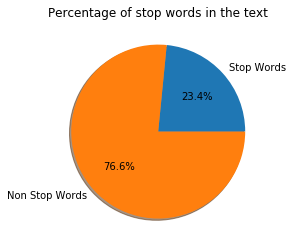

After Preprocessing 

Count after removing Stop Words:  49
Distinct Words:  40


---------------------------------------------------------------------------------
Reading input text
---------------------------------------------------------------------------------
Total Words:  69


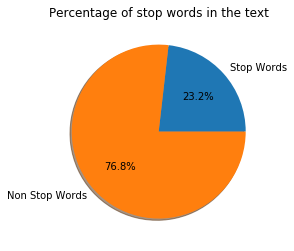

After Preprocessing 

Count after removing Stop Words:  53
Distinct Words:  43


---------------------------------------------------------------------------------
OUTPUT
SIMILARITY between both the texts is:  0.833 


In [32]:
# Driver code 
Text_similarity(text1, text2)